<a href="https://colab.research.google.com/github/mefrem/DS-Unit-2-Regression-Classification/blob/master/module3/module_3_assignment_regression_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 3

## Assignment

We're going back to our other **New York City** real estate dataset. Instead of predicting apartment rents, you'll predict property sales prices.

But not just for condos in Tribeca...

Instead, predict property sales prices for **One Family Dwellings** (`BUILDING_CLASS_CATEGORY` == `'01 ONE FAMILY DWELLINGS'`). 

Use a subset of the data where the **sale price was more than \\$100 thousand and less than $2 million.** 

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

- [ ] Do train/test split. Use data from January — March 2019 to train. Use data from April 2019 to test.
- [ ] Do one-hot encoding of categorical features.
- [ ] Do feature selection with `SelectKBest`.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Fit a ridge regression model with multiple features.
- [ ] Get mean absolute error for the test set.
- [ ] As always, commit your notebook to your fork of the GitHub repo.


## Stretch Goals
- [ ] Add your own stretch goal(s) !
- [ ] Instead of `RidgeRegression`, try `LinearRegression`. Depending on how many features you select, your errors will probably blow up! 💥
- [ ] Instead of `RidgeRegression`, try [`RidgeCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html).
- [ ] Learn more about feature selection:
    - ["Permutation importance"](https://www.kaggle.com/dansbecker/permutation-importance)
    - [scikit-learn's User Guide for Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)
    - [mlxtend](http://rasbt.github.io/mlxtend/) library
    - scikit-learn-contrib libraries: [boruta_py](https://github.com/scikit-learn-contrib/boruta_py) & [stability-selection](https://github.com/scikit-learn-contrib/stability-selection)
    - [_Feature Engineering and Selection_](http://www.feat.engineering/) by Kuhn & Johnson.
- [ ] Try [statsmodels](https://www.statsmodels.org/stable/index.html) if you’re interested in more inferential statistical approach to linear regression and feature selection, looking at p values and 95% confidence intervals for the coefficients.
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module3')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd
import pandas_profiling

# Read New York City property sales data
df = pd.read_csv('../data/condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

# Change column names: replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

# SALE_PRICE was read as strings.
# Remove symbols, convert to integer
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)

In [0]:
# BOROUGH is a numeric column, but arguably should be a categorical feature,
# so convert it from a number to a string
df['BOROUGH'] = df['BOROUGH'].astype(str)

In [0]:
# Reduce cardinality for NEIGHBORHOOD feature

# Get a list of the top 10 neighborhoods
top10 = df['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10, 
# replace the neighborhood with 'OTHER'
df.loc[~df['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'

In [0]:
df.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,OTHER,13 CONDOS - ELEVATOR APARTMENTS,2,716,1246,NaN,R4,"447 WEST 18TH STREET, PH12A",PH12A,10011.0,1.0,0.0,1.0,"10,733",1979.0,2007.0,2,R4,0,01/01/2019


In [0]:
# Narrowing data by SALE PRICE and BUILDING CLASS CATEGORY
sale_price_mask = (df['SALE_PRICE'] > 100000) & (df['SALE_PRICE'] < 2000000)
dwelling_mask = (df['BUILDING_CLASS_CATEGORY']=='01 ONE FAMILY DWELLINGS')
df = df.loc[sale_price_mask]
df = df.loc[dwelling_mask]

In [0]:
df.loc[]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
44,3,OTHER,01 ONE FAMILY DWELLINGS,1,5495,801,NaN,A9,4832 BAY PARKWAY,NaN,11230.0,1.0,0.0,1.0,"6,800",1325.0,1930.0,1,A9,550000,2019-01-01
61,4,OTHER,01 ONE FAMILY DWELLINGS,1,7918,72,NaN,A1,80-23 232ND STREET,NaN,11427.0,1.0,0.0,1.0,"4,000",2001.0,1940.0,1,A1,200000,2019-01-01
78,2,OTHER,01 ONE FAMILY DWELLINGS,1,4210,19,NaN,A1,1260 RHINELANDER AVE,NaN,10461.0,1.0,0.0,1.0,"3,500",2043.0,1925.0,1,A1,810000,2019-01-02
108,3,OTHER,01 ONE FAMILY DWELLINGS,1,5212,69,NaN,A1,469 E 25TH ST,NaN,11226.0,1.0,0.0,1.0,"4,000",2680.0,1899.0,1,A1,125000,2019-01-02
111,3,OTHER,01 ONE FAMILY DWELLINGS,1,7930,121,NaN,A5,5521 WHITTY LANE,NaN,11203.0,1.0,0.0,1.0,"1,710",1872.0,1940.0,1,A5,620000,2019-01-02
120,3,OTHER,01 ONE FAMILY DWELLINGS,1,6806,72,NaN,A1,1747 EAST 23RD STREET,NaN,11229.0,1.0,0.0,1.0,"4,000",1932.0,1930.0,1,A1,1150000,2019-01-02
121,3,OTHER,01 ONE FAMILY DWELLINGS,1,6761,42,NaN,A1,1582 EAST 15TH STREET,NaN,11230.0,1.0,0.0,1.0,"2,000",1722.0,1920.0,1,A1,836500,2019-01-02
132,4,OTHER,01 ONE FAMILY DWELLINGS,1,7378,4,NaN,A1,201-08 50TH AVENUE,NaN,11364.0,1.0,0.0,1.0,"3,000",1396.0,1930.0,1,A1,955000,2019-01-02
137,4,OTHER,01 ONE FAMILY DWELLINGS,1,2882,16,NaN,A5,85-11 57 ROAD,NaN,11373.0,1.0,0.0,1.0,"1,800",1260.0,1935.0,1,A5,820000,2019-01-02
141,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,7407,50,NaN,A0,53-19 198TH STREET,NaN,11365.0,1.0,0.0,1.0,"4,000",1440.0,1945.0,1,A0,980000,2019-01-02


In [0]:
# Just confirming that there are only 6 neighborhoods represented in this subset of house sales
df.NEIGHBORHOOD.describe()

count      3151
unique        6
top       OTHER
freq       2990
Name: NEIGHBORHOOD, dtype: object

In [0]:
# Creating train and test dataframes

df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'],infer_datetime_format=True, format='%m%d%Y')

cutoff = pd.to_datetime('2019-04-01')
train = df[df.SALE_DATE < cutoff]
test  = df[df.SALE_DATE >= cutoff]

In [0]:
# One-hot encoding categorical features. First off, what are our cat features?
cat_columns = ['BOROUGH','NEIGHBORHOOD']

features = ['BOROUGH','NEIGHBORHOOD','GROSS_SQUARE_FEET']
target = 'SALE_PRICE'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [0]:
X_train.shape # We now have 12 features from the original 3 (Borough, neighborhood, a square footage) 

(2507, 12)

### Number of Features and Impact on MSE

In [0]:
# Let's see which features we ought to choose for our regression model

from sklearn.feature_selection import f_regression, SelectKBest

selector = SelectKBest(score_func=f_regression,k=12)

# Noting that we use .fit_transform on train DataFrame, .transform on test
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape

((2507, 12), (644, 12))

In [0]:
# It looks like all features were selected! But let's make sure

all_names = X_train.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features selected:')
for name in selected_names:
  print(name)

Features selected:
BOROUGH_3
BOROUGH_4
BOROUGH_2
BOROUGH_5
BOROUGH_1
NEIGHBORHOOD_OTHER
NEIGHBORHOOD_FLUSHING-NORTH
NEIGHBORHOOD_BEDFORD STUYVESANT
NEIGHBORHOOD_FOREST HILLS
NEIGHBORHOOD_BOROUGH PARK
NEIGHBORHOOD_ASTORIA
GROSS_SQUARE_FEET


In [0]:
# Which features to use? I think all 12 would be sufficient but what does SelectKBest tell us?

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

mae_list = []

for k in range(1, len(X_train.columns) + 1):
  print(f'{k} features')

  selector = SelectKBest(score_func=f_regression,k=k)

  X_train_selected = selector.fit_transform(X_train,y_train)
  X_test_selected = selector.transform(X_test)

  # Printing features used
  selected_mask = selector.get_support()
  selected_names = all_names[selected_mask]
  unselected_names = all_names[~selected_mask]
  print('Features selected:')
  for name in selected_names:
    print(name)
    
  model = LinearRegression()
  model.fit(X_train_selected, y_train)
  y_pred = model.predict(X_test_selected)

  mae = mean_absolute_error(y_test,y_pred)
  mae_list.append(mae)
  print(f'Test MAEL ${mae:,.0f} \n')

1 features
Features selected:
GROSS_SQUARE_FEET
Test MAEL $183,641 

2 features
Features selected:
NEIGHBORHOOD_OTHER
GROSS_SQUARE_FEET
Test MAEL $174,496 

3 features
Features selected:
BOROUGH_3
NEIGHBORHOOD_OTHER
GROSS_SQUARE_FEET
Test MAEL $184,149 

4 features
Features selected:
BOROUGH_3
BOROUGH_5
NEIGHBORHOOD_OTHER
GROSS_SQUARE_FEET
Test MAEL $180,281 

5 features
Features selected:
BOROUGH_3
BOROUGH_5
NEIGHBORHOOD_OTHER
NEIGHBORHOOD_FOREST HILLS
GROSS_SQUARE_FEET
Test MAEL $178,845 

6 features
Features selected:
BOROUGH_3
BOROUGH_2
BOROUGH_5
NEIGHBORHOOD_OTHER
NEIGHBORHOOD_FOREST HILLS
GROSS_SQUARE_FEET
Test MAEL $212,907 

7 features
Features selected:
BOROUGH_3
BOROUGH_2
BOROUGH_5
NEIGHBORHOOD_OTHER
NEIGHBORHOOD_FLUSHING-NORTH
NEIGHBORHOOD_FOREST HILLS
GROSS_SQUARE_FEET
Test MAEL $214,530 

8 features
Features selected:
BOROUGH_3
BOROUGH_2
BOROUGH_5
NEIGHBORHOOD_OTHER
NEIGHBORHOOD_FLUSHING-NORTH
NEIGHBORHOOD_FOREST HILLS
NEIGHBORHOOD_BOROUGH PARK
GROSS_SQUARE_FEET
Test MAEL 

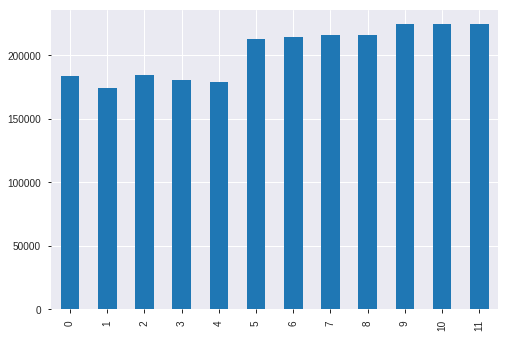

In [0]:
bias_variance_tradeoff = pd.Series(data=mae_list)
bias_variance_tradeoff.plot(kind='bar')

The bias-variance tradeoff is optimal at 4 features, which were:
```
4 features
Features selected:
BOROUGH_3
BOROUGH_5
NEIGHBORHOOD_OTHER
GROSS_SQUARE_FEET
Test MAEL $180,281
```

In [0]:
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

X_train_scaled = scale(X_train)
y_train_scaled = scale(y_train)
X_test_scaled = scale(X_test)
y_test_scaled = scale(y_test)

lin_reg_train = LinearRegression().fit(X_train_scaled, y_train_scaled)
mean_squared_error(y_train_scaled, lin_reg_train.predict(X_train_scaled)) # Score indicates OVERFITTING

0.6504076932678007

In [0]:
# Let's check if this model generalizes
mean_squared_error(y_test_scaled,lin_reg_train.predict(X_test_scaled))

# Yea, MSE is through the roof.

1.8467046079607686e+26

### Ridgle Regression

In [0]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train_scaled,y_train_scaled)
mean_squared_error(y_train_scaled,ridge_reg.predict(X_train_scaled))

# This MSE is for an alpha of 0 on our Ridge regressor. Let's scale it up

0.6492681878471547

In [0]:
alphas = []
mses = []

for alpha in range(0, 200, 1):
    ridge_reg = Ridge(alpha=alpha).fit(X_train_scaled, y_train_scaled)
    mse = mean_squared_error(y_test_scaled, ridge_reg.predict(X_test_scaled))
    print(alpha, mse)
    alphas.append(alpha)
    mses.append(mse)

0 1.846704607960763e+26
1 0.7910797008147289
2 0.7910138025954141
3 0.7909480591854345
4 0.7908824702788486
5 0.7908170355703584
6 0.7907517547553743
7 0.790686627529957
8 0.790621653590883
9 0.7905568326355854
10 0.7904921643622064
11 0.7904276484695476
12 0.7903632846570978
13 0.7902990726250251
14 0.7902350120741652
15 0.7901711027060313
16 0.7901073442228097
17 0.790043736327354
18 0.7899802787231851
19 0.7899169711144913
20 0.7898538132061271
21 0.7897908047036077
22 0.7897279453131094
23 0.7896652347414684
24 0.7896026726961781
25 0.7895402588853879
26 0.789477993017902
27 0.789415874803177
28 0.7893539039513188
29 0.7892920801730845
30 0.7892304031798765
31 0.7891688726837455
32 0.7891074883973828
33 0.7890462500341253
34 0.7889851573079489
35 0.7889242099334689
36 0.7888634076259374
37 0.788802750101243
38 0.7887422370759082
39 0.7886818682670872
40 0.7886216433925664
41 0.7885615621707602
42 0.7885016243207096
43 0.7884418295620841
44 0.7883821776151744
45 0.7883226682008974
4

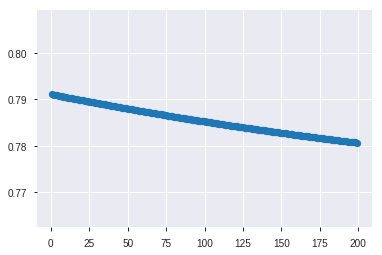

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(alphas[1:], mses[1:]);

In [0]:
# It looks like there's a slight dip in the curve, but hard to tell: I'll choose 78 alpha
ridge_reg = Ridge(alpha=78).fit(X_train_scaled, y_train_scaled)
mse = mean_squared_error(y_test_scaled, ridge_reg.predict(X_test_scaled))
mse # MSE on test data is only slightly higher than on linear regression MSE

0.7864370277091888